Let's import necessary package for this project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Context and Business Understanding

In this day and age, CO2 emission remains a significant issue throughout the world. One of the striking issues related to CO2 emission is the global inequality in CO2 emission. By analyzing the comprehensive CO2 emission data from multiple countries with timestamp, researchers can analyze historical data to identify trends in CO2 emissions over time. By comparing emissions data across countries and regions, researchers can find variations and disparities, NGOs like Union Nation may make use of this information to collaborate internationally, share best practices, and implement effective policies.

# Research questions

 1. Which regions and countries have the highest CO2 emissions over time ?
 2. Are there outliers in the data set? If so , how to find and remove the outliers?
 3. Which industries have the highest CO2 emissions overtime？
 4. What are the trends and patterns regarding CO2 emissions?
 5. In which season do we expect the highest global CO2 emissions?
 6. What is the average gloabal CO2 emissions each year?


# Load the data set

The data set was downloaded from Kaggle. And the URL is https://www.kaggle.com/datasets/saloni1712/co2-emissions?resource=download. This data set provides a good example of carbon emissions exploration for combating climate change. Regarding the data collection, we can figure out from the web page that the data set is from https://carbonmonitor.org/, which provides official data release with countries and sectors CO2 emissions changes up to August 31 2023.

In [5]:
path= "dataset.csv"
df = pd.read_csv(path)
df

,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800
...,...,...,...,...,...
135403,Russia,31/05/2023,International Aviation,0.016524,1685491200
135404,Spain,31/05/2023,International Aviation,0.068408,1685491200
135405,UK,31/05/2023,International Aviation,0.103774,1685491200
135406,US,31/05/2023,International Aviation,0.200409,1685491200


# Preprocessing and cleaning

For the first step , let's convert the date to a more readable format. And the column timestamp is hard to understand and useless, thus we can remove it.

In [6]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
del df['timestamp']
df.head()

,country,date,sector,value
0,Brazil,2019-01-01,Power,0.096799
1,China,2019-01-01,Power,14.816100
2,EU27 & UK,2019-01-01,Power,1.886490
3,France,2019-01-01,Power,0.051217
4,Germany,2019-01-01,Power,0.315002


Check the summary of numeric and non-numeric values. The dataset comprises a total of 14 countries, spanning a duration of 1,612 days, and encompassing 6 distinct sectors.

In [11]:
df.describe(include=['O']) # summary of non-numeric values

,country,sector
count,135408,135408
unique,14,6
top,Spain,Power
freq,9672,22568


In [13]:
df['value'].describe() #summary of numeric values

count    135408.000000
mean          2.359439
std           5.908582
min           0.000078
25%           0.078661
50%           0.314597
75%           1.636632
max          46.263500
Name: value, dtype: float64

Check null values. We can find no missing values in the data set.

In [14]:
df.isnull().sum() 

country    0
date       0
sector     0
value      0
dtype: int64

# Outliers detection (Research question 2)

We use the z-value method to detect outliers from the data, and in the actual data cleaning process,. The z-score is a well-known statistical measure that quantifies how far a particular data point is from the mean of a distribution in terms of standard deviations. It is calculated using:z = x − µ/σ. In the formula, x is the data point for which you want to calculate the z-score, µ is the mean of the distribution and σ  is the standard deviation of the distribution. For this part we group the data based on country and sector, for each combination of country and sector we calculate the mean and standard deviation, if z-score is higher than 3 then we consider the current data point is an outlier. Finally we get 725 outliers for 135408 rows, this indicates the issue of outliers is not serious.


In [15]:

# Grouping and Aggregating
grouped_df = df.groupby(['country', 'sector'])
aggregated_df = grouped_df.agg({'value': ['mean', 'std']})
.reset_index()

# Renaming Columns
aggregated_df.columns = ['country2', 'sector2', 'MeanEmissions', 'StdDevEmissions']

# Merging DataFrames
merged_df = pd.merge(df, aggregated_df, how='left', left_on=['country', 'sector'],
                     right_on=['country2', 'sector2'])

# Calculating IsOutlier column
threshold = 3
merged_df['IsOutlier'] = ((merged_df['value'] > merged_df['MeanEmissions'] + threshold * merged_df['StdDevEmissions']) |
                          (merged_df['value'] < merged_df['MeanEmissions'] - threshold * merged_df['StdDevEmissions']))

# Filtering Outliers
outlier_df = merged_df[merged_df['IsOutlier']]

# Counting Outliers
print(outlier_df.shape[0])


725


Let's remove the outliers. This can answer research question 2. There are 725 outliers.

In [19]:
df = merged_df[merged_df['IsOutlier']== False]

In [ ]:
df

In [21]:
df = df[['country','date','sector','value']]

In [22]:
df

,country,date,sector,value
0,Brazil,2019-01-01,Power,0.096799
1,China,2019-01-01,Power,14.816100
2,EU27 & UK,2019-01-01,Power,1.886490
3,France,2019-01-01,Power,0.051217
4,Germany,2019-01-01,Power,0.315002
...,...,...,...,...
135403,Russia,2023-05-31,International Aviation,0.016524
135404,Spain,2023-05-31,International Aviation,0.068408
135405,UK,2023-05-31,International Aviation,0.103774
135406,US,2023-05-31,International Aviation,0.200409


# Research Question 1

For each country we can try to plot the sum of CO2 emissions for all the sectors with date as x axis in a bar plot. On top of that we can also make a pivot table and plot the fluctuation of CO2 emissions ove time for each region or country. The line of the world indicates that the world trend has higher but more fluctuate CO2 consumption value compared to other individual countries, as it is a lump-sum value. And as for the main contributor of global CO emissions, the top country is China, followed by ROW and US.

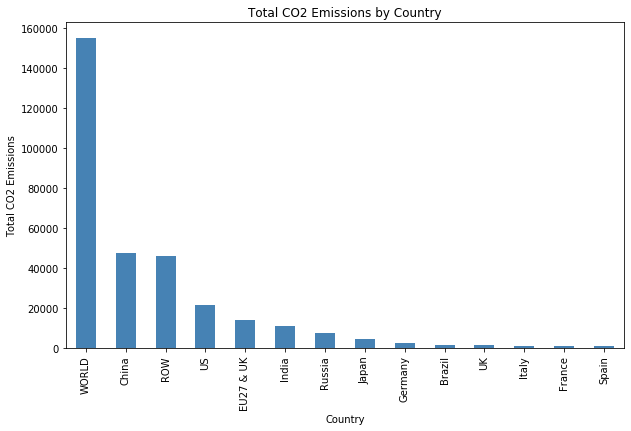

In [24]:
total_emissions_by_country = df.groupby('country')['value'].sum().sort_values(ascending=False)

# Plot total CO2 emissions by sector
plt.figure(figsize=(10, 6))
total_emissions_by_country.plot(kind='bar', color='steelblue')
plt.title('Total CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.show()

Let's create a pivot table and plot a stacked line plot accordingly.

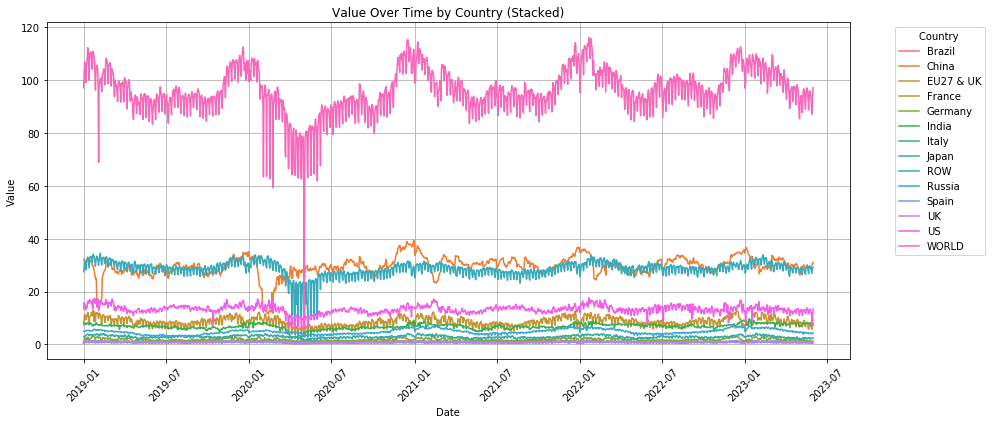

In [41]:

pivot_df = df.pivot_table(index='date', columns=['country'], values='value', aggfunc='sum')


plt.figure(figsize=(12, 6))  


sns.lineplot(data=pivot_df, dashes=False)

plt.title('Value Over Time by Country (Stacked)')
plt.xlabel('Date')
plt.ylabel('Value')

plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.legend(title='Country ', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Research question 3

For industries, we can apply the similar approach as above. Generally speaking, Power, Industry and Ground Transport have the highest level of CO2 emissions. The power sector leads with 60k MtCO2/day CO2 emissions, closely followed by industries and group transportation.

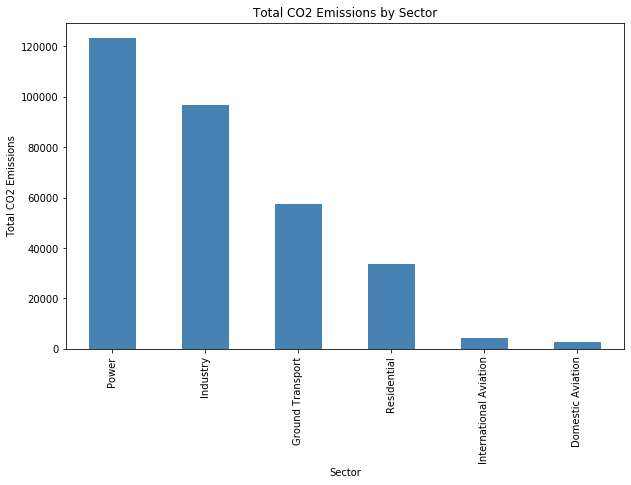

In [23]:
total_emissions_by_sector = df.groupby('sector')['value'].sum().sort_values(ascending=False)

# Plot total CO2 emissions by sector
plt.figure(figsize=(10, 6))
total_emissions_by_sector.plot(kind='bar', color='steelblue')
plt.title('Total CO2 Emissions by Sector')
plt.xlabel('Sector')
plt.ylabel('Total CO2 Emissions')
plt.show()

We can arrive at the same conclusion as well from the pivot table and diagram below.

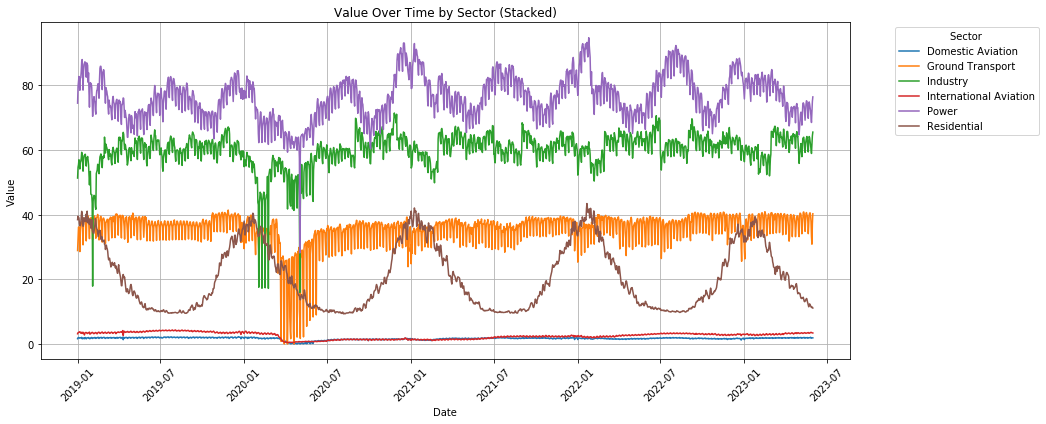

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = df.pivot_table(index='date', columns=['sector'], values='value', aggfunc='sum')


plt.figure(figsize=(12, 6))  

sns.lineplot(data=pivot_df, dashes=False)

plt.title('Value Over Time by Sector (Stacked)')
plt.xlabel('Date')
plt.ylabel('Value')

plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.legend(title='Sector ', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Research question 4

For this resarch question, we can plot the time-series data regarding only the global CO2 emission. For a clearer comparision, we separately plot the date from 2019 till 2023 in five diagrams. The results can be viewed as below.

In [25]:
df_world = df[df['country']=='WORLD']

In [26]:
df_world = df_world.groupby('date').sum(numeric_only=True)['value'].reset_index() #Group by date
df_world = df_world.sort_values(by='date') #Sort values by date

# Extract year from each data point
df_world['Year'] = df_world['date'].dt.year

In [27]:
df_world

,date,value,Year
0,2019-01-01,97.141047,2019
1,2019-01-02,103.160961,2019
2,2019-01-03,105.631020,2019
3,2019-01-04,106.902631,2019
4,2019-01-05,102.685335,2019
...,...,...,...
1607,2023-05-27,91.023892,2023
1608,2023-05-28,87.063033,2023
1609,2023-05-29,89.986660,2023
1610,2023-05-30,94.550309,2023


Fetch CO2 emission data for each year from 2019 till 2023 (data in 2023 is not completely 12 months).

In [28]:
df_world_2019 = df_world[df_world['Year'] == 2019]
df_world_2020 = df_world[df_world['Year'] == 2020]
df_world_2021 = df_world[df_world['Year'] == 2021]
df_world_2022 = df_world[df_world['Year'] == 2022]
df_world_2023 = df_world[df_world['Year'] == 2023]

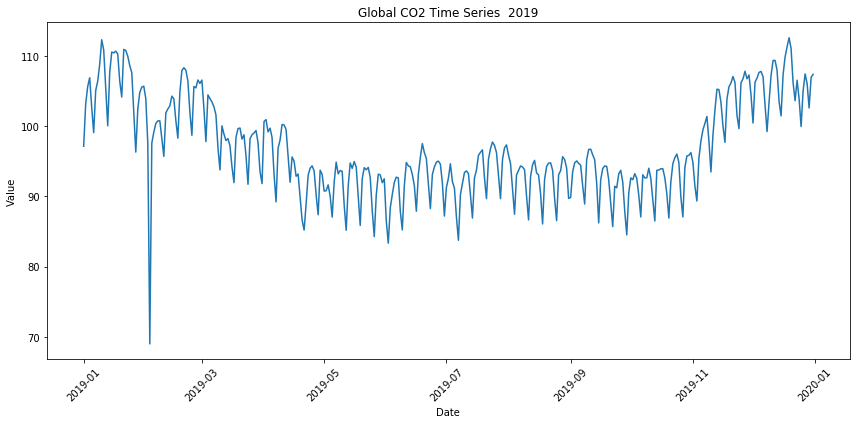

In [29]:
plt.figure(figsize=(12, 6)) 

plt.plot(df_world_2019['date'], df_world_2019['value'], linestyle='-')  # date as x axis ，co2 emissions as y axis
plt.title('Global CO2 Time Series  2019')  # title
plt.xlabel('Date')  # x - axis title
plt.ylabel('Value')  # y-axis title

plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show() 

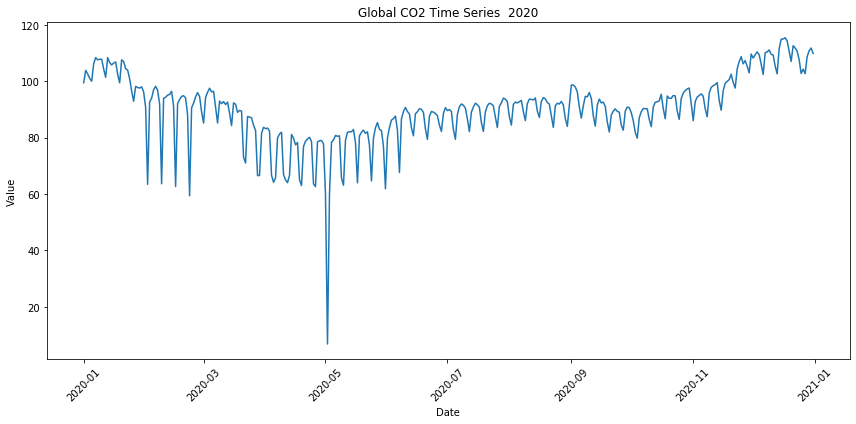

In [30]:
plt.figure(figsize=(12, 6)) 

plt.plot(df_world_2020['date'], df_world_2020['value'], linestyle='-')  # date as x axis ，co2 emissions as y axis
plt.title('Global CO2 Time Series  2020')  # title
plt.xlabel('Date')  # x - axis title
plt.ylabel('Value')  # y-axis title

plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show() 

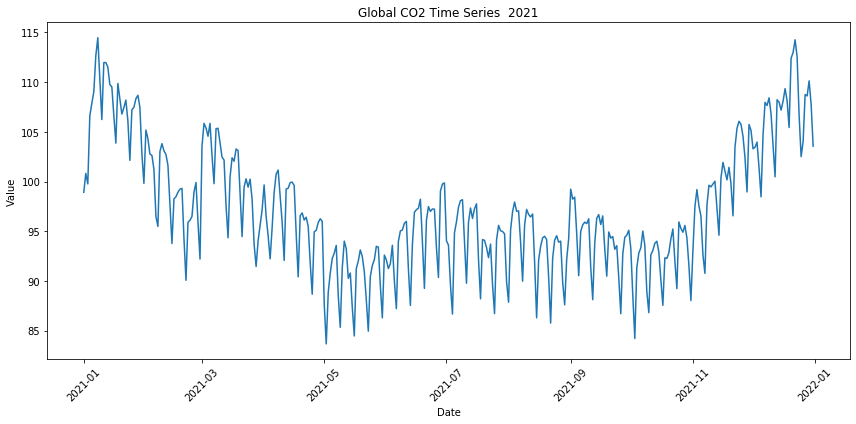

In [31]:
plt.figure(figsize=(12, 6)) 

plt.plot(df_world_2021['date'], df_world_2021['value'], linestyle='-')  # date as x axis ，co2 emissions as y axis
plt.title('Global CO2 Time Series  2021')  # title
plt.xlabel('Date')  # x - axis title
plt.ylabel('Value')  # y-axis title

plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show() 

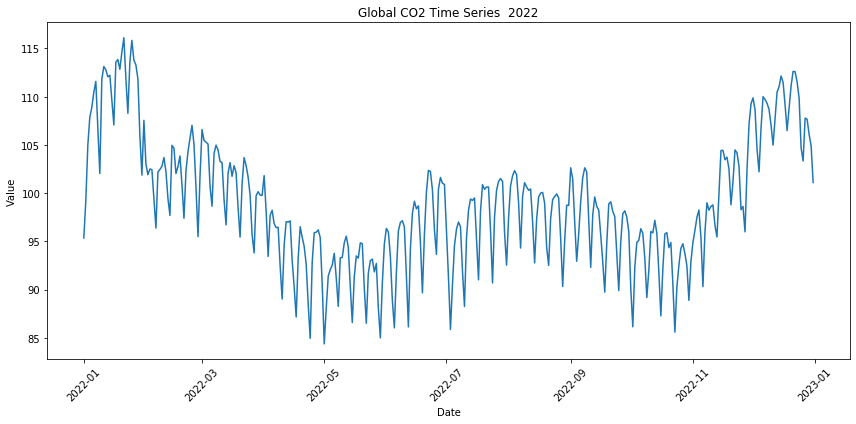

In [32]:
plt.figure(figsize=(12, 6)) 

plt.plot(df_world_2022['date'], df_world_2022['value'], linestyle='-')  # date as x axis ，co2 emissions as y axis
plt.title('Global CO2 Time Series  2022')  # title
plt.xlabel('Date')  # x - axis title
plt.ylabel('Value')  # y-axis title

plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show() 

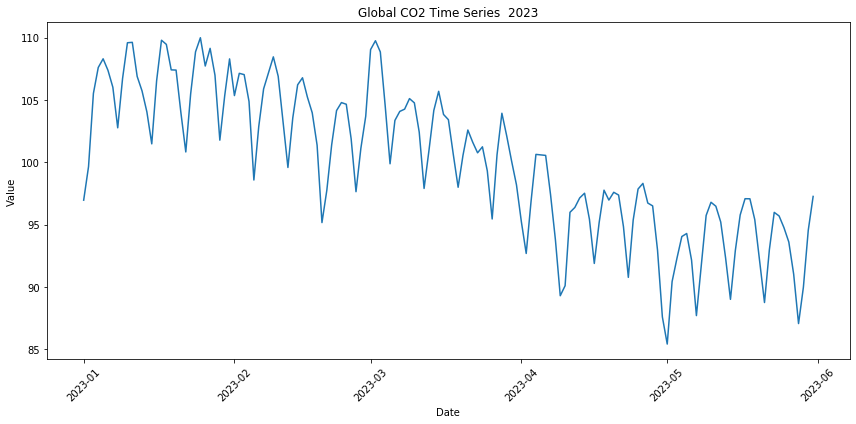

In [33]:
plt.figure(figsize=(12, 6)) 

plt.plot(df_world_2023['date'], df_world_2023['value'], linestyle='-')  # date as x axis ，co2 emissions as y axis
plt.title('Global CO2 Time Series  2023')  # title
plt.xlabel('Date')  # x - axis title
plt.ylabel('Value')  # y-axis title

plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show()

For the patterns, obviously we can see the indication of swing for each year, and we can find out that generally speaking the global CO2 emissions are increasing year by year. We can also deduct that the lowest CO2 emission level can be observed in May, which is the case in each year. The CO2 levels are higher at the beginning and the end of the year than the remaining time.



# Research Question 5

We can plot the fluctuation of CO2 emission level for each countey and try to summarize the pattern. As can be seen in the diagrams, during winters , global CO2 emissions tend to rise due to an increase in the demand for heating. Conversely, during summers the CO2 emissions tend to decrease. Thus we can figure out a pattern that the CO2 emissions in winters(for Northern hemisphere) is higher than other seasons, and in sum- mers we observe the lowest emissions. 

In [34]:
def plot_country_co2_emissions(country):
    df = df_country[df_country['country']==country]
    plt.figure(figsize=(12, 6))  

    
    for year in df['Year'].unique():
        subset = df[df['Year'] == year]  
        plt.plot(subset['date'], subset['value'], label=f'Year {year}', linestyle='-')  

    plt.title('Value Over Time by Year'+'_' +country)
    plt.xlabel('Date')
    plt.ylabel('CO2 emissions')

    plt.grid(True)  
    plt.legend()  
    plt.xticks(rotation=45)  

    plt.tight_layout() 
    plt.show()  

In [36]:
df_country = df.groupby(['date','country']).sum(numeric_only=True)['value'].reset_index()
df_country = df_country.sort_values(by='date')
df_country['Year'] = df_country['date'].dt.year


In [50]:
df_country['country'].unique()

array(['Brazil', 'WORLD', 'US', 'UK', 'Spain', 'ROW', 'Japan', 'Russia',
       'India', 'Germany', 'France', 'EU27 & UK', 'China', 'Italy'],
      dtype=object)

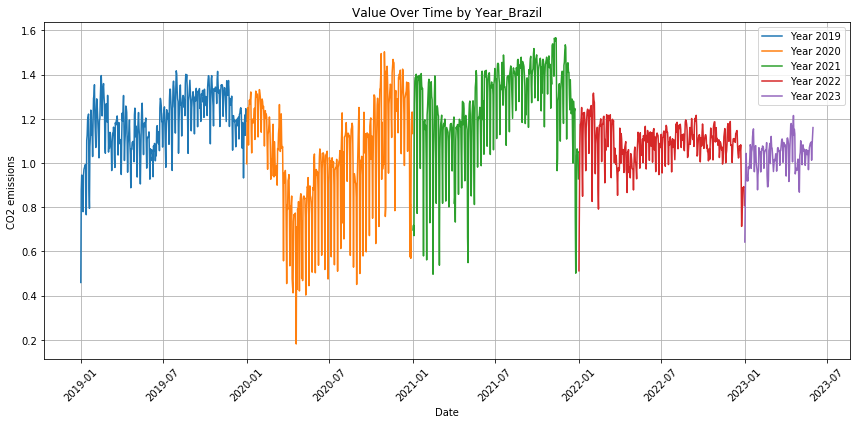

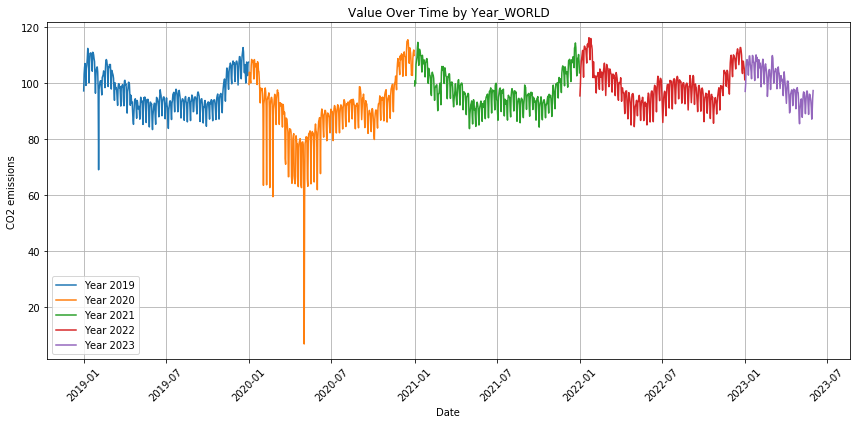

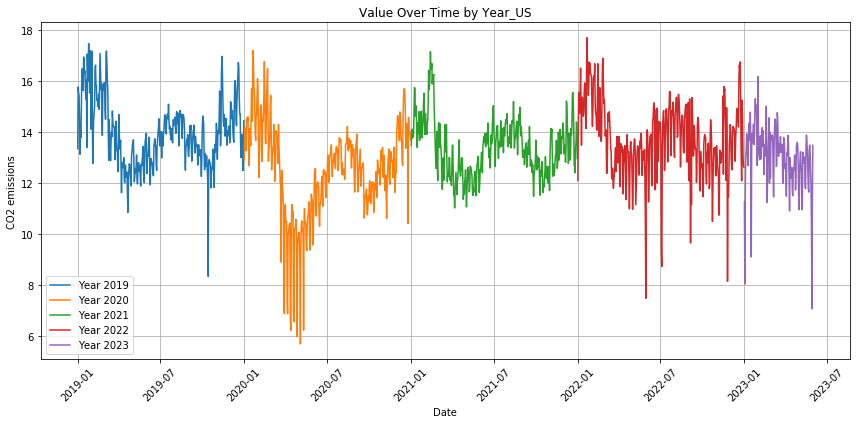

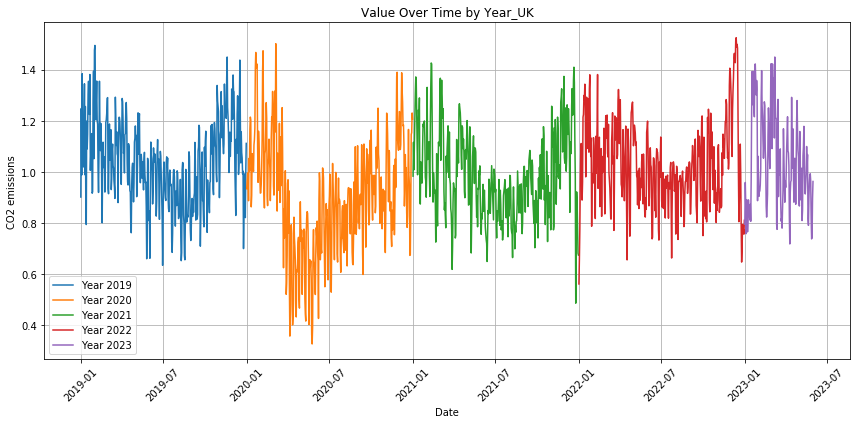

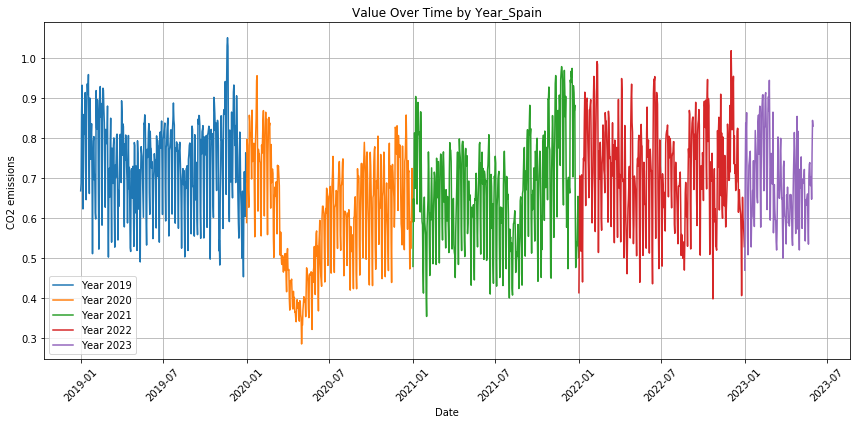

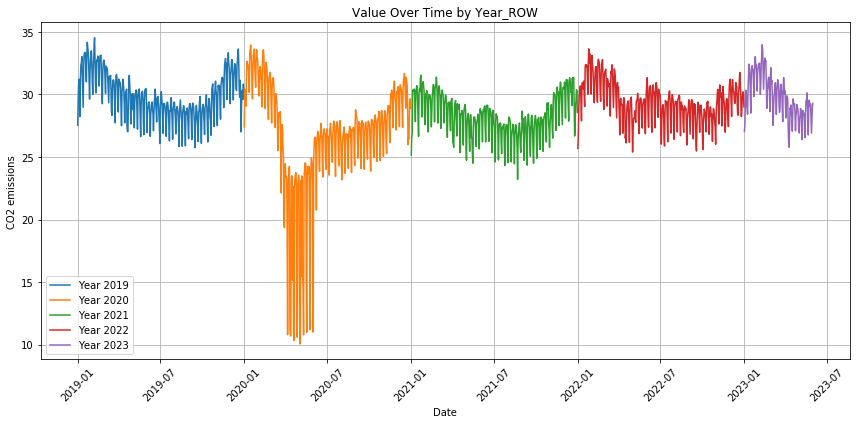

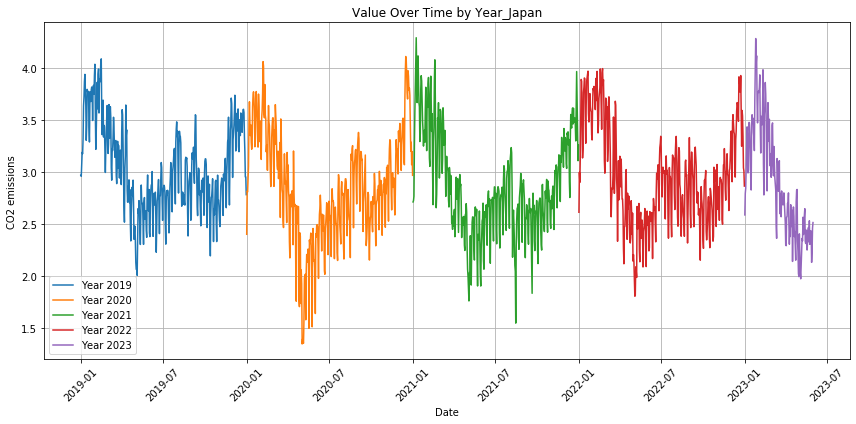

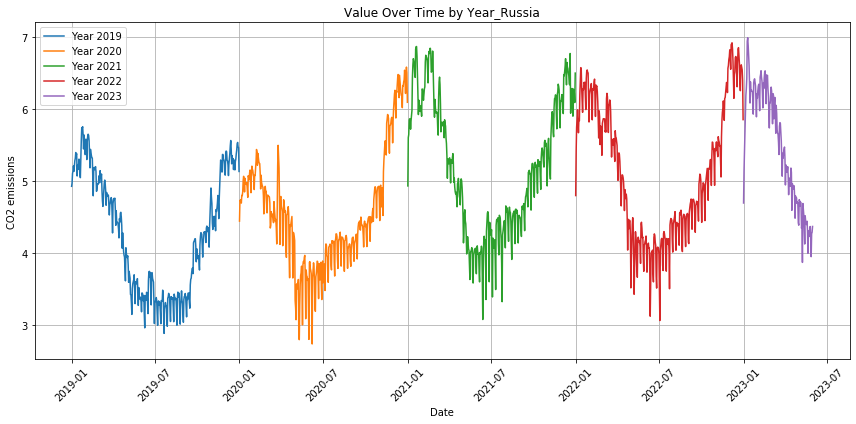

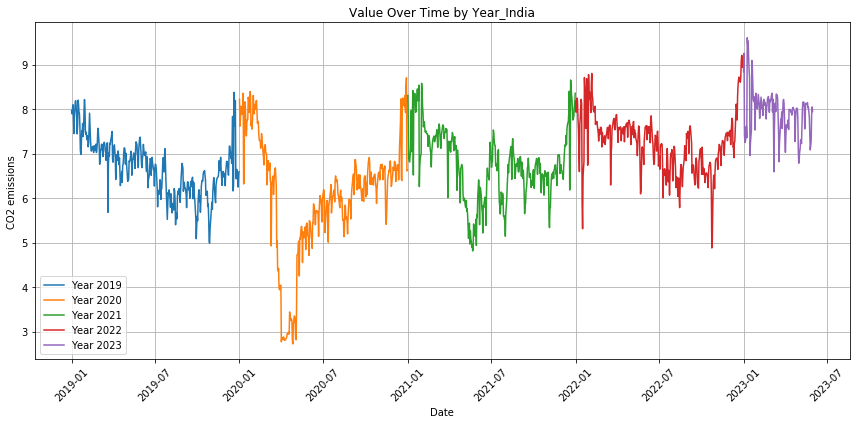

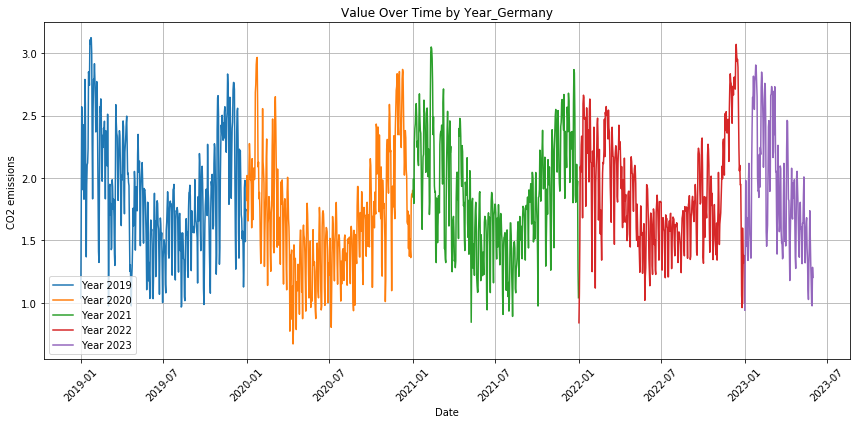

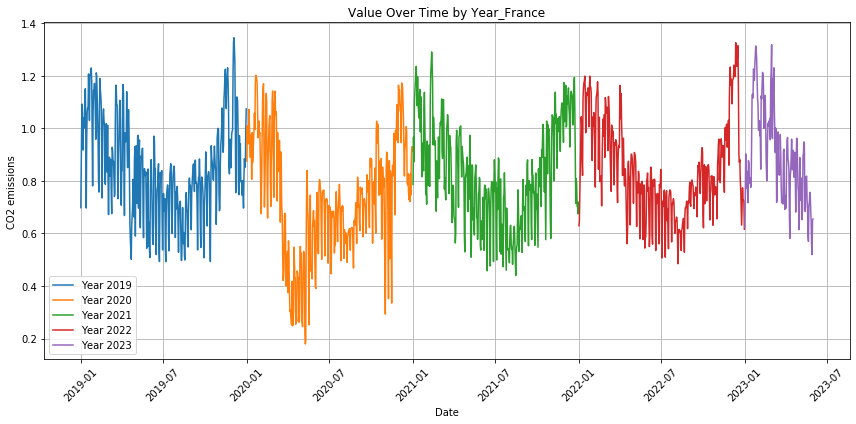

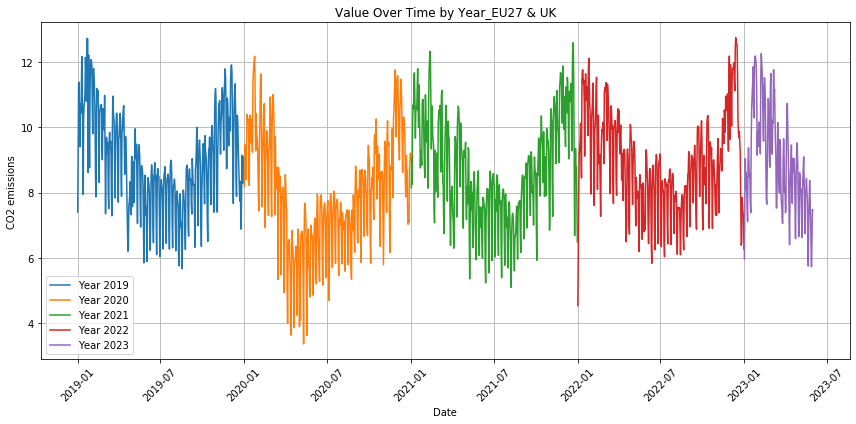

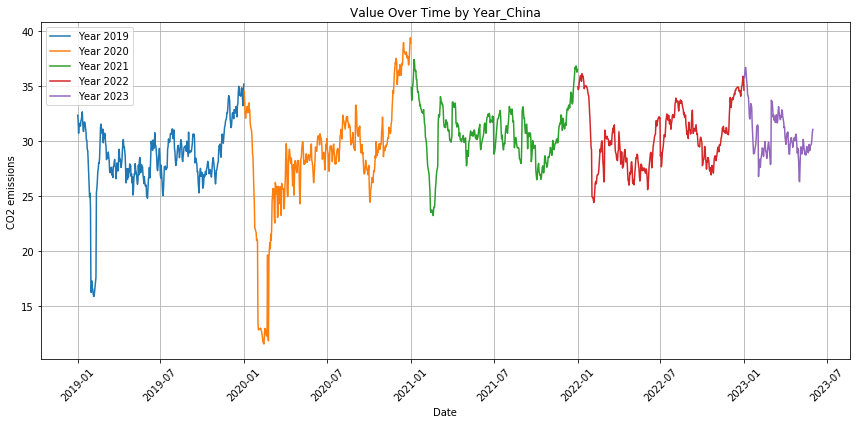

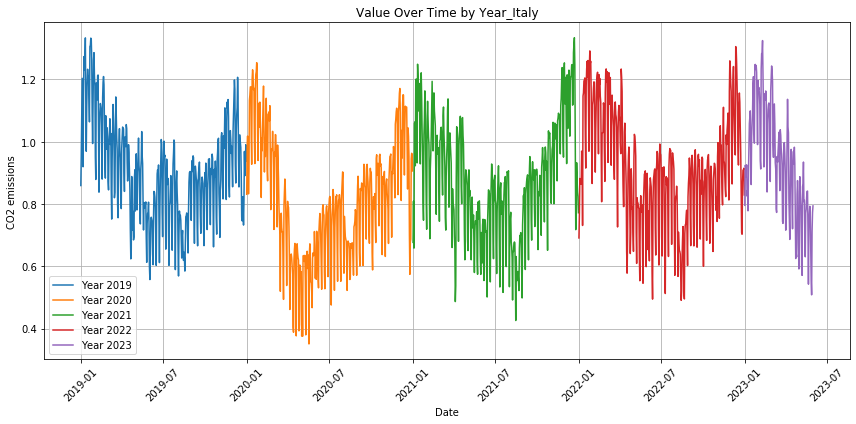

In [37]:
for country in df_country['country'].unique():
    plot_country_co2_emissions(country)

# Research Question 6

We can look into this question with the help of pandas api. We find out that for all 5 years the average CO2 emission per ay is 96.224, for 2019 the value is 96.77, for 2020 we observe a decline to 90.30, for 2021 the value is 97.282, for 2022 the value is 98.96, for 2023 the value is 100.09.

In [38]:
df_world

,date,value,Year
0,2019-01-01,97.141047,2019
1,2019-01-02,103.160961,2019
2,2019-01-03,105.631020,2019
3,2019-01-04,106.902631,2019
4,2019-01-05,102.685335,2019
...,...,...,...
1607,2023-05-27,91.023892,2023
1608,2023-05-28,87.063033,2023
1609,2023-05-29,89.986660,2023
1610,2023-05-30,94.550309,2023


In [44]:
df_world['value'].mean()

96.2240822772954

In [45]:
df_world_2019['value'].mean()

96.76909528493154

In [46]:
df_world_2020['value'].mean()

90.30346413114756

In [47]:
df_world_2021['value'].mean()

97.28214245479458

In [48]:
df_world_2022['value'].mean()

98.95743020547944

In [49]:
df_world_2023['value'].mean()

100.09264211258281